<a href="https://colab.research.google.com/github/sejun42/CO-CANE/blob/main/Alpha_Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import torch #PyTorch 라이브러리를 사용하기 위한 기본 패키지
import torch.nn as nn #신경망 모델을 정의하는데 사용되는 클래스와 함수를 포함
import torch.nn.functional as F #활성화 함수와 다양한 함수적인 기능들을 포함함
from torchvision.datasets import ImageFolder #이미지폴더에서 데이터셋을 불러오기 위한 클래스
import torch.optim as optim #최적화 알고리즘을 사용하기 위한 클래스와 함수를 제공함
from torch.utils.data import DataLoader, random_split #데이터셋을 미니배치로 나누고 데이터를 로드하는데 사용되는 유틸리티 클래스임
import matplotlib #데이터 시각화
import matplotlib.pyplot as plt 
import cv2 # OpenCV
import torchvision #다양한 컴퓨터 비전 작업을 위한 라이브러리임
from torchvision.transforms import transforms as T #데이터 전처리를 위한 변환함수를 포함함
import os #운영체제와 상호작용하기 위한 함수를 제공함
from tqdm import tqdm #작업 진행률을 표시하는 프로그레스바를 제공함
from tqdm.notebook import tqdm as tqdm_nb 
import PIL #이미지를 처리하기 위한 파이썬 이미징 라이브러리
import numpy as np #다차원 배열을 처리하는 라이브러리
import pandas as pd #데이터 분석 및 조작을 위한 라이브러리
import torchsummary #PyTorch 모델 요약 정보를 출력하는 도구
import glob #파일 목록을 검색하는데 사용되는 패턴 매칭을 지원하는 모듈

In [51]:
from google.colab import drive #jupyter notebook과 visual code에서 사진을 불러오는데 실패하여 구글 코랩을 활용하기 위해 사용. 구글 드라이브에 접근할 수 있게 한다.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


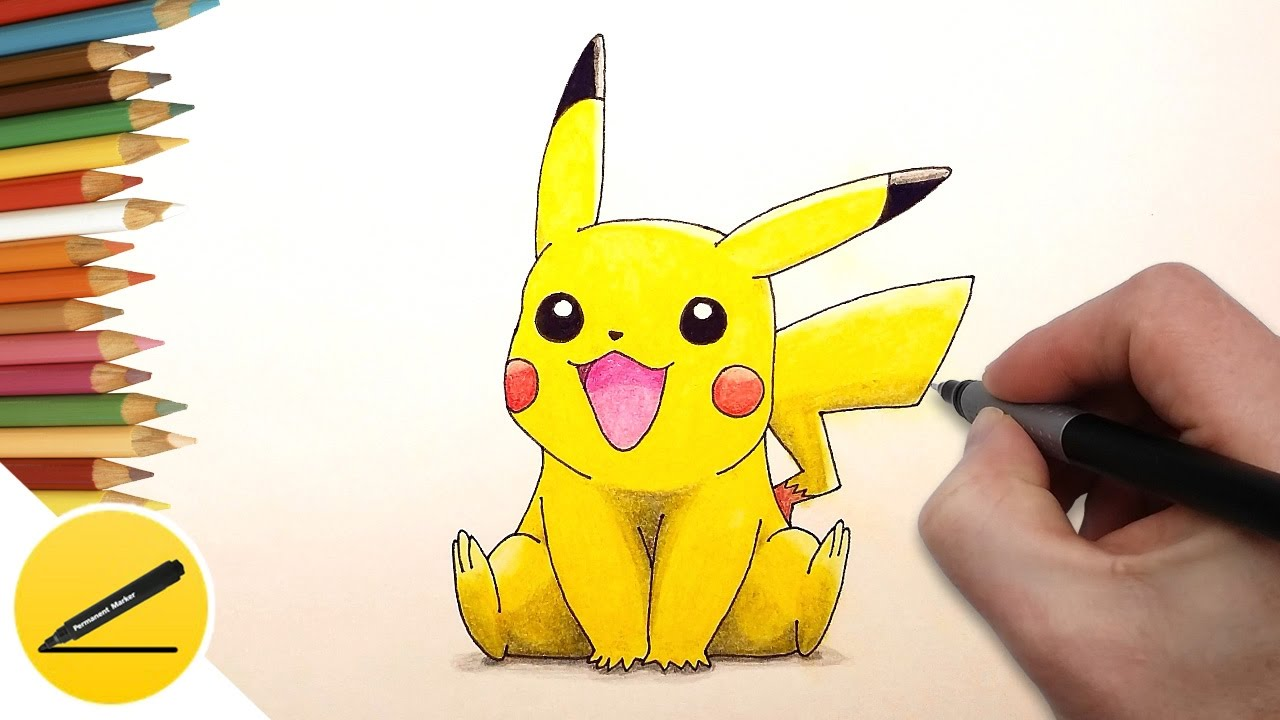

img.shape (720, 1280, 3)


In [52]:
#이미지 확인 및 크기 확인
from google.colab.patches import cv2_imshow #구글 코랩에서 OpenCV로 읽은 이미지를 표시하기 위해 cv2_imshow 함수를 사용하기 위해 필요한 패치
import cv2
img = cv2.imread("/content/drive/MyDrive/pokemon/pikachu/00000000.jpg")
if img is not None:
    cv2_imshow(img)
    print('img.shape', img.shape)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("이미지를 읽을 수 없습니다.")

In [53]:
#@title 기본 제목 텍스트
#Transforms
#전처리를 위한 코드 작성하세요.

trans = T.Compose([
    T.Resize((224, 224)), #이미지 사이즈 변환
    T.ToTensor(),  # 이미지를 텐서로 변환
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 이미지 정규화?
])

In [54]:
root_dir = '/content/drive/MyDrive/pokemon' #데이터 셋이 위치한 디렉토리의 경로를 지정함
dataset = ImageFolder(root = root_dir,transform = trans) #위에서 정의한 root_dir와 trans를 ImageFolder의 파라미터로 넣음. 이렇게 생성된 데이터셋은 이미지 파일과 해당 이미지의 레이블을 매핑한 형태로 구성됨
print(dataset.__len__()) #데이터셋의 총 샘플 수를 출력함
Test_dataset = ImageFolder(root = '/content/drive/MyDrive/pokemon', transform = trans) #테스트 데이터셋도 동일한 방식으로 생성함. 

558


In [55]:
print(Test_loader.dataset)
# print(valid_loader.dataset)

Dataset ImageFolder
    Number of datapoints: 558
    Root location: /content/drive/MyDrive/pokemon
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [56]:
#데이터 로더를 생성하여 학습 데이터, 검증 데이터, 테스트 데이터를 배치 단위로 불러옴
train_size = int(dataset.__len__() * 0.8) #학습 데이터는 전체중 80%
valid_size = dataset.__len__() - train_size #나머지 20%로 검증

training_data, valid_data = random_split(dataset, [train_size, valid_size]) #random_split()함수를 사용하여 전체 데이터셋을 학습데이터와 검증데이터로 무작위로 나눔.

train_loader = DataLoader(training_data, batch_size=32, shuffle=True) #배치단위로 불러올 수 있게 DataLoader를 생성. 한번에 32개의 이미지와 레이블을 가져옴. Shuffle이 True면 섞음.
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)
Test_loader = DataLoader(Test_dataset, batch_size=32, shuffle=False)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


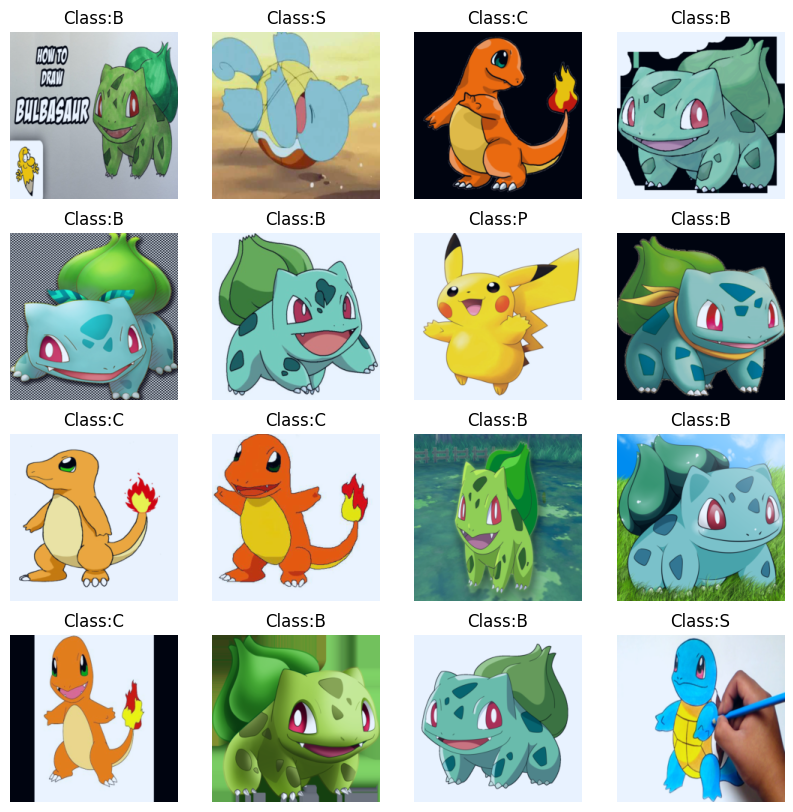

In [57]:
#학습 데이터로부터 일부 이미지를 시각화하여 확인하는 부분
class_names = ['B','C','P','S']
plt.figure(figsize=(10, 10))
images, labels = next(iter(train_loader))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  img = images[i]
  img = (img - img.min())/(img.max() - img.min())
  plt.imshow(img.permute(1, 2, 0).numpy())
  plt.title(f'Class:{class_names[labels[i]]}')
  plt.axis("off")

주석을 다세요.

In [58]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' #현재 시스템에서 CUDA가 사용 가능한 경우 device변수를 cuda로 설정하고, 그렇지 않은 경우 CPU를 사용하기 위해 cpu로 설정함.

torch.manual_seed(0) #랜덤 시드 값을 설정함. 시드 값을 설정하면 같은 랜덤 값을 생성할 때 동일한 결과를 얻을 수 있다.
if device == 'cuda':
    torch.cuda.manual_seed_all(0)

In [59]:
#네트워크를 직접 구성하고 자세히 설명하세요.

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1) #3개의 입력 채널, 8개의 출력채널을 가지는 3x3 커널 사이즈의 합성곱(Convolution) 레이어. stride는 필터가 움직이는 정도. padding을 통해서 이미지 크기의 손실을 없애줌.
        self.relu1 = nn.ReLU() #Relu(Rectified Linear Unit) 활성화 함수를 적용함
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) #2x2 크기의 최대 풀링 레이어
        #이미지의 크기를 계속 유지한 채 fully Connnected layer를 하면 연산량이 기하급수적으로 늘게 되므로 적당히 크기도 줄이고 특징을 강조할 수 있는 pooling layer를 사용한다.
        #이미지 데이터의 특징은 인접한 픽셀들 간의 유사도가 매우 높다는 점임. 따라서 이미지는 픽셀 수준이 아니라, 특정 속성을 갖는 선택 영역 수준으로 표현될 수 있다. 
        #polling layer 장점 : 선택 영역 내부에서 픽셀들이 이동 및 회전 등에 의해 위치가 변경되더라도 출력값은 동일함. 이미지를 구성하는 요소들의 이동 및 회전 등에 의해 CNN의 출력값이 영향을 받는 문제를 완화할 수 있음.
        #CNN이 처리해야하는 이미지의 크기가 크게 줄어들기 때문에 인공신경망의 model parameter 또한 크게 감소함, 따라서 polling layer를 활용함으로써 CNN의 학습 시간을 크게 절약할 수 있으며, 오버피팅문제 또한 어느정도 완화할 수 있다.  

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers
        self.fc1 = nn.Linear(16 * 56 * 56, 256) #32x56x56차원의 입력을 받아 256차원의 출력을 생성하는 선형레이어
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(256, 128) #256차원의 입력을 받아 128차원의 출력을 생성하는 선형 레이어
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(128, num_classes) #128차원의 입력을 받아 num_classes개의 출력 클래스를 생성하는 레이

    def forward(self, x):
        # Convolutional Layers
        #모델의 순전파 연산을 정의하는 메서드임. 
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully Connected Layers
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        x = self.relu4(x)
        x = self.fc3(x)

        return x


레이어 구성 설명을 해주세요

In [60]:
cnn = CNN(num_classes=4).to(device) #CNN클래스를 인스턴스화함

In [61]:
#최적화 함수 및 손실함수

optimizer = optim.Adam(cnn.parameters(), lr=0.001) # \Adam 옵티마이저 생성. 학습률 learning rate를 0.001로 설정.
criterion = nn.CrossEntropyLoss() 

In [62]:
torchsummary.summary(cnn,(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 224, 224]             224
              ReLU-2          [-1, 8, 224, 224]               0
         MaxPool2d-3          [-1, 8, 112, 112]               0
            Conv2d-4         [-1, 16, 112, 112]           1,168
              ReLU-5         [-1, 16, 112, 112]               0
         MaxPool2d-6           [-1, 16, 56, 56]               0
            Linear-7                  [-1, 256]      12,845,312
              ReLU-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
             ReLU-10                  [-1, 128]               0
           Linear-11                    [-1, 4]             516
Total params: 12,880,116
Trainable params: 12,880,116
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Fo

In [ ]:
epochs =  10

torch.cuda.empty_cache()    
train_losses = []
val_losses = []
train_acc = []
val_acc = []

for e in range(epochs):
    # training loop
    running_loss = 0       
    running_accuracy = 0 
    cnn.train()
    for _, data in enumerate(tqdm(train_loader)):
                 
        inputs, labels = data
        inputs = inputs.to(device).float()
        labels = labels.to(device).long()
        optimizer.zero_grad()
              
        outputs = cnn(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)            
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        running_accuracy += torch.sum(preds == labels.data).detach().cpu().numpy()/inputs.size(0)


    # validation loop
    cnn.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for _, data in enumerate(tqdm(valid_loader)):                
            inputs, labels = data
            inputs = inputs.to(device).float()
            labels = labels.to(device).long()

    
            outputs = cnn(inputs)
            _, preds = torch.max(outputs, 1)
        
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy += torch.sum(preds == labels.data).detach().cpu().numpy()/inputs.size(0)

    # calculate mean for each batch
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(valid_loader))
    train_acc.append(running_accuracy / len(train_loader))
    val_acc.append(val_accuracy / len(valid_loader))
    print("Epoch:{}/{}..".format(e + 1, epochs),
            "Train Loss: {:.3f}..".format(running_loss / len(train_loader)),
            "Val Loss: {:.3f}..".format(val_loss / len(valid_loader)),
            "Train 정확도:{:.3f}..".format(running_accuracy / len(train_loader)),
            "Val 정확도:{:.3f}..".format(val_accuracy / len(valid_loader)))

history = {'train_loss': train_losses, 'val_loss': val_losses,
            'train_acc': train_acc, 'val_acc': val_acc}

100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Epoch:1/10.. Train Loss: 0.998.. Val Loss: 0.545.. Train 정확도:0.586.. Val 정확도:0.734..


100%|██████████| 4/4 [00:04<00:00,  1.20s/it]


Epoch:2/10.. Train Loss: 0.334.. Val Loss: 0.277.. Train 정확도:0.879.. Val 정확도:0.875..


100%|██████████| 4/4 [00:04<00:00,  1.24s/it]


Epoch:3/10.. Train Loss: 0.175.. Val Loss: 0.147.. Train 정확도:0.928.. Val 정확도:0.945..


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


Epoch:4/10.. Train Loss: 0.065.. Val Loss: 0.159.. Train 정확도:0.978.. Val 정확도:0.938..


100%|██████████| 4/4 [00:03<00:00,  1.02it/s]


Epoch:5/10.. Train Loss: 0.019.. Val Loss: 0.158.. Train 정확도:0.998.. Val 정확도:0.977..


100%|██████████| 4/4 [00:03<00:00,  1.01it/s]


Epoch:6/10.. Train Loss: 0.006.. Val Loss: 0.160.. Train 정확도:1.000.. Val 정확도:0.977..


 79%|███████▊  | 11/14 [00:18<00:05,  1.69s/it]

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(history['train_acc'],marker = 'o', ms = 2, label = "Train accuracy")
plt.plot(history['val_acc'],marker = 'o', ms = 2, label = "Valid accuracy")
plt.title(f'Accuracy');
plt.ylabel('Acc');
plt.xlabel('epoch')
plt.legend(), plt.grid()

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(history['train_loss'],marker = 'o', ms = 2, label = "Train loss")
plt.plot(history['val_loss'],marker = 'o', ms = 2, label = "Valid loss")
plt.title(f'Loss');
plt.ylabel('Loss');
plt.xlabel('epoch')
plt.legend(), plt.grid()

In [ ]:
### Test
cnn.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for _, data in enumerate(tqdm(Test_loader)):
        inputs, labels = data                    
        inputs = inputs.to(device).float()            
        outputs = cnn(inputs)
        _, preds = torch.max(outputs, 1)                        
        y_pred += list(preds.detach().cpu().numpy())
        y_true += list(labels.detach().numpy())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('\n 분류 결과 성능 \n\n',
  classification_report(
      y_true,
      y_pred,
       target_names=class_names
      )
  )

---------------------------------------------------------------------------------------------------------------

## 학습한 모델로 Prediction 구현해보기 - 선택사항

In [ ]:
#Test 이미지를 넣어 잘 분류하는지 확인하기 위한 코드 작성. - 선택사항 